## Elipsoide Problema Direto_Clark_Comparacao

## Coisas para importar

In [1]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

%matplotlib inline

## Importar minhas funções de um arquivo externo

In [2]:
import Elipsoide_Clark_FAT_Unificado as me

## Input

In [10]:
Xp = np.array([-200., -100., 0., 100., 200.])
Yp = np.zeros_like(Xp)
Zp = np.zeros_like(Xp)

#xc posicao x , yc posição y e h profundidade reais
xc = 0.
yc = 0.
zc = 300.

# Orientacoes do elipsoide
azimuth = 50.
delta = 45.
gamma = -45.

# Eixos do elipsoide
a = 250.
b = 150.
c = 100.

# Set the inclination and declination of the regional field
inten, inc, dec  = 60000., -65., -80.0    #nT, graus, graus

################################################################################################################################
################################################################################################################################

model = []
# Create a ellipsoid model (Prolate)
model.append(me.Ellipsoid(Xp, Yp, Zp, xc, yc, zc, a, b, c, azimuth, delta, gamma, 
                          {'remanence': np.array([0, 90., 0.]),
                           'k1': np.array([0.001, 0., 90.]),
                           'k2': np.array([0.001, 0., 180.]),
                           'k3': np.array([0.001, 90., 0.])}
                          ))

In [11]:
model[0].mcon

array([[ 0.45451948,  0.54167522, -0.70710678],
       [ 0.22028142, -0.8375417 , -0.5       ],
       [-0.86306903,  0.07149726, -0.5       ]])

## Cálculos

In [12]:
# Calculate the anomaly for a given regional field (Prolate)
JRD_cart = me.jrd_cartesiano (inten,inc,dec,model)
Bx = me.bx_c (Xp,Yp,Zp,inten,inc,dec,model)
By = me.by_c (Xp,Yp,Zp,inten,inc,dec,model)
Bz = me.bz_c (Xp,Yp,Zp,inten,inc,dec,model)
Tf = me.tf_c (Xp,Yp,Zp,inten,inc,dec,model)

In [13]:
JRD_cart

[[59.762519860863065, -65.016261229206592, -79.840962878177095]]

In [18]:
JRD_cart[0][2]+90.

10.159037121822905

In [14]:
Bz_Clark = np.array([-11.4, -32.2, -66.7, -72.0, -29.3])
Bt_Clark = np.array([5.9, 23.6, 57.1, 67.5, 28.3])

## Resultado da minha função

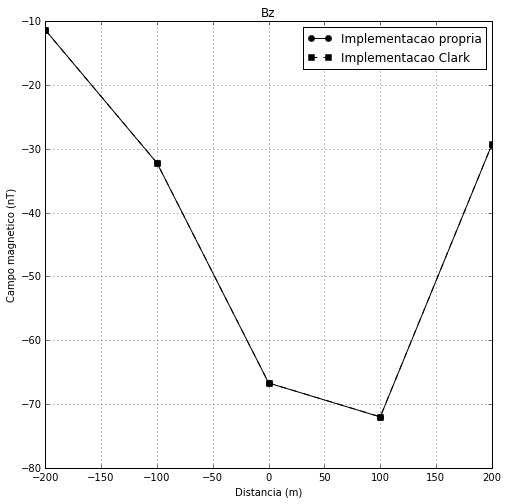

In [15]:
plt.figure(figsize=(8,8))

plt.plot()
plt.plot(Xp, Bz, '-ko', label="Implementacao propria")
plt.plot(Xp, Bz_Clark, '--ks', label="Implementacao Clark")
plt.xlabel('Distancia (m)')
plt.ylabel('Campo magnetico (nT)')
plt.title('Bz')
plt.grid(True)
plt.legend()
#plt.savefig('Bz_Emerson.jpg', dpi=200)
plt.show()

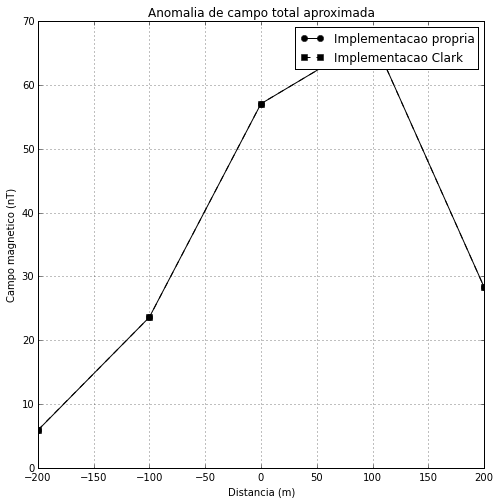

In [16]:
plt.figure(figsize=(8,8))

plt.plot()
plt.plot(Xp, Tf, '-ko', label='Implementacao propria')
plt.plot(Xp, Bt_Clark, '--ks', label="Implementacao Clark")
plt.xlabel('Distancia (m)')
plt.ylabel('Campo magnetico (nT)')
plt.title('Anomalia de campo total aproximada')
plt.grid(True)
plt.legend()
#plt.savefig('Anomalia_Emerson.jpg', dpi=200)
plt.show()